In [1]:
import pandas as pd

In [2]:
winners = pd.read_csv('Winners.csv')
winners

,opponent_abbr,boxscore_index,datetime,extra_points_perc,field_goal_perc,field_goals_attempted,fourth_down_perc,fourth_down_attempts,interceptions,location,...,rush_touchdowns,rush_yards,rush_yards_per_attempt,third_down_perc,third_downs,time_of_possession,times_sacked,yards_lost_from_sacks,season,result
0,MIN,202009130min,2020-09-13 00:00:00,1.00,1.00,2,0.5,2,0,Away,...,1,158,4.9,0.55,11,41.27,0,0,2020,Win
1,DET,202009200gnb,2020-09-20 00:00:00,1.00,1.00,2,1.0,1,0,Home,...,2,259,7.4,0.50,12,34.77,1,11,2020,Win
2,NOR,202009270nor,2020-09-27 00:00:00,1.00,1.00,3,0.5,2,0,Away,...,1,98,3.8,0.45,11,31.67,1,12,2020,Win
3,ATL,202010050gnb,2020-10-05 00:00:00,0.75,1.00,1,0.5,2,0,Home,...,0,88,3.4,0.55,11,29.63,1,12,2020,Win
4,HTX,202010250htx,2020-10-25 00:00:00,1.00,NaN,0,NaN,0,0,Away,...,1,96,3.6,0.58,12,28.90,0,0,2020,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,SDG,201110230nyj,2011-10-23 00:00:00,1.00,1.00,2,NaN,0,1,Home,...,0,162,5.2,0.62,13,32.77,2,17,2011,Win
2547,BUF,201111060buf,2011-11-06 00:00:00,1.00,0.67,3,NaN,0,1,Away,...,2,126,3.2,0.55,11,37.87,1,8,2011,Win
2548,BUF,201111270nyj,2011-11-27 00:00:00,1.00,NaN,0,1.0,1,1,Home,...,0,138,6.0,0.45,11,23.82,0,0,2011,Win
2549,WAS,201112040was,2011-12-04 00:00:00,1.00,0.67,3,1.0,1,0,Away,...,3,101,3.4,0.31,13,32.20,0,0,2011,Win


In [3]:
losers = pd.read_csv('Losers.csv')
losers.columns

Index(['opponent_abbr', 'boxscore_index', 'datetime', 'extra_points_perc',
       'field_goal_perc', 'field_goals_attempted', 'fourth_down_perc',
       'fourth_down_attempts', 'interceptions', 'location', 'pass_attempts',
       'pass_completion_rate', 'pass_touchdowns', 'pass_yards',
       'yards_per_completion', 'points_allowed', 'points_scored', 'punt_yards',
       'punts', 'quarterback_rating', 'rush_attempts', 'rush_touchdowns',
       'rush_yards', 'rush_yards_per_attempt', 'third_down_perc',
       'third_downs', 'time_of_possession', 'times_sacked',
       'yards_lost_from_sacks', 'season', 'result'],
      dtype='object')

In [4]:
winners.drop(columns=['result'], inplace=True)
w_cols = []
for col in winners.columns:
    w_cols.append('w_'+col)
winners.rename(columns=dict(zip(winners.columns, w_cols)),inplace=True)
winners.head()

,w_opponent_abbr,w_boxscore_index,w_datetime,w_extra_points_perc,w_field_goal_perc,w_field_goals_attempted,w_fourth_down_perc,w_fourth_down_attempts,w_interceptions,w_location,...,w_rush_attempts,w_rush_touchdowns,w_rush_yards,w_rush_yards_per_attempt,w_third_down_perc,w_third_downs,w_time_of_possession,w_times_sacked,w_yards_lost_from_sacks,w_season
0,MIN,202009130min,2020-09-13 00:00:00,1.00,1.0,2,0.5,2,0,Away,...,32,1,158,4.9,0.55,11,41.27,0,0,2020
1,DET,202009200gnb,2020-09-20 00:00:00,1.00,1.0,2,1.0,1,0,Home,...,35,2,259,7.4,0.50,12,34.77,1,11,2020
2,NOR,202009270nor,2020-09-27 00:00:00,1.00,1.0,3,0.5,2,0,Away,...,26,1,98,3.8,0.45,11,31.67,1,12,2020
3,ATL,202010050gnb,2020-10-05 00:00:00,0.75,1.0,1,0.5,2,0,Home,...,26,0,88,3.4,0.55,11,29.63,1,12,2020
4,HTX,202010250htx,2020-10-25 00:00:00,1.00,NaN,0,NaN,0,0,Away,...,27,1,96,3.6,0.58,12,28.90,0,0,2020


In [5]:
losers.drop(columns=['result'], inplace=True)
l_cols = []
for col in losers.columns:
    l_cols.append('l_'+col)
losers.rename(columns=dict(zip(losers.columns, l_cols)),inplace=True)
losers.head()

,l_opponent_abbr,l_boxscore_index,l_datetime,l_extra_points_perc,l_field_goal_perc,l_field_goals_attempted,l_fourth_down_perc,l_fourth_down_attempts,l_interceptions,l_location,...,l_rush_attempts,l_rush_touchdowns,l_rush_yards,l_rush_yards_per_attempt,l_third_down_perc,l_third_downs,l_time_of_possession,l_times_sacked,l_yards_lost_from_sacks,l_season
0,TAM,202010180tam,2020-10-18 00:00:00,1.0,1.0,1,NaN,0,2,Away,...,21,1,94,4.5,0.41,17,31.62,5,53,2020
1,MIN,202011010gnb,2020-11-01 00:00:00,1.0,NaN,0,0.6,5,0,Home,...,24,0,109,4.5,0.45,11,32.20,1,0,2020
2,CLT,202011220clt,2020-11-22 00:00:00,1.0,1.0,1,0.0,1,1,Away,...,18,1,66,3.7,0.44,9,27.82,1,10,2020
3,OTI,202010130oti,2020-10-13 00:00:00,1.0,1.0,1,NaN,0,2,Away,...,22,0,95,4.3,0.76,17,32.40,1,10,2020
4,KAN,202010190buf,2020-10-19 00:00:00,1.0,0.5,2,NaN,0,1,Home,...,23,0,84,3.7,0.44,9,22.25,0,0,2020


In [6]:
winners.rename(columns={'w_boxscore_index':'boxscore_index'}, inplace=True)
losers.rename(columns={'l_boxscore_index':'boxscore_index'}, inplace=True)
df = winners.merge(losers, on='boxscore_index')

In [7]:
df.head()

,w_opponent_abbr,boxscore_index,w_datetime,w_extra_points_perc,w_field_goal_perc,w_field_goals_attempted,w_fourth_down_perc,w_fourth_down_attempts,w_interceptions,w_location,...,l_rush_attempts,l_rush_touchdowns,l_rush_yards,l_rush_yards_per_attempt,l_third_down_perc,l_third_downs,l_time_of_possession,l_times_sacked,l_yards_lost_from_sacks,l_season
0,MIN,202009130min,2020-09-13 00:00:00,1.00,1.0,2,0.5,2,0,Away,...,22,2,134,6.1,0.50,6,18.73,2,11,2020
1,DET,202009200gnb,2020-09-20 00:00:00,1.00,1.0,2,1.0,1,0,Home,...,21,1,89,4.2,0.50,12,25.23,4,26,2020
2,NOR,202009270nor,2020-09-27 00:00:00,1.00,1.0,3,0.5,2,0,Away,...,20,0,122,6.1,0.45,11,28.33,2,13,2020
3,ATL,202010050gnb,2020-10-05 00:00:00,0.75,1.0,1,0.5,2,0,Home,...,25,2,78,3.1,0.25,12,30.37,4,36,2020
4,HTX,202010250htx,2020-10-25 00:00:00,1.00,NaN,0,NaN,0,0,Away,...,22,0,79,3.6,0.43,14,31.10,3,23,2020


In [8]:
df.drop(columns=['l_datetime', 'l_season'], inplace=True)
df.head()

,w_opponent_abbr,boxscore_index,w_datetime,w_extra_points_perc,w_field_goal_perc,w_field_goals_attempted,w_fourth_down_perc,w_fourth_down_attempts,w_interceptions,w_location,...,l_quarterback_rating,l_rush_attempts,l_rush_touchdowns,l_rush_yards,l_rush_yards_per_attempt,l_third_down_perc,l_third_downs,l_time_of_possession,l_times_sacked,l_yards_lost_from_sacks
0,MIN,202009130min,2020-09-13 00:00:00,1.00,1.0,2,0.5,2,0,Away,...,116.7,22,2,134,6.1,0.50,6,18.73,2,11
1,DET,202009200gnb,2020-09-20 00:00:00,1.00,1.0,2,1.0,1,0,Home,...,87.7,21,1,89,4.2,0.50,12,25.23,4,26
2,NOR,202009270nor,2020-09-27 00:00:00,1.00,1.0,3,0.5,2,0,Away,...,126.3,20,0,122,6.1,0.45,11,28.33,2,13
3,ATL,202010050gnb,2020-10-05 00:00:00,0.75,1.0,1,0.5,2,0,Home,...,88.5,25,2,78,3.1,0.25,12,30.37,4,36
4,HTX,202010250htx,2020-10-25 00:00:00,1.00,NaN,0,NaN,0,0,Away,...,111.7,22,0,79,3.6,0.43,14,31.10,3,23


In [9]:
cols = df.columns.to_list()
cols.remove('boxscore_index')
cols.remove('w_datetime')
cols.remove('w_season')
print(cols)

['w_opponent_abbr', 'w_extra_points_perc', 'w_field_goal_perc', 'w_field_goals_attempted', 'w_fourth_down_perc', 'w_fourth_down_attempts', 'w_interceptions', 'w_location', 'w_pass_attempts', 'w_pass_completion_rate', 'w_pass_touchdowns', 'w_pass_yards', 'w_yards_per_completion', 'w_points_allowed', 'w_points_scored', 'w_punt_yards', 'w_punts', 'w_quarterback_rating', 'w_rush_attempts', 'w_rush_touchdowns', 'w_rush_yards', 'w_rush_yards_per_attempt', 'w_third_down_perc', 'w_third_downs', 'w_time_of_possession', 'w_times_sacked', 'w_yards_lost_from_sacks', 'l_opponent_abbr', 'l_extra_points_perc', 'l_field_goal_perc', 'l_field_goals_attempted', 'l_fourth_down_perc', 'l_fourth_down_attempts', 'l_interceptions', 'l_location', 'l_pass_attempts', 'l_pass_completion_rate', 'l_pass_touchdowns', 'l_pass_yards', 'l_yards_per_completion', 'l_points_allowed', 'l_points_scored', 'l_punt_yards', 'l_punts', 'l_quarterback_rating', 'l_rush_attempts', 'l_rush_touchdowns', 'l_rush_yards', 'l_rush_yards_

In [10]:
df['ep_perc_diff'] = df.w_extra_points_perc - df.l_extra_points_perc
df['fg_perc_diff'] = df.w_field_goal_perc - df.l_field_goal_perc
df['fg_attempt_diff'] = df.w_field_goals_attempted - df.l_field_goals_attempted
df['fourth_down_attempt_diff'] = df.w_fourth_down_attempts - df.l_fourth_down_attempts
df['interception_diff'] = df.w_interceptions - df.l_interceptions
df['pass_diff'] = df.w_pass_attempts - df.l_pass_attempts
df['pass_compl_perc_diff'] = df.w_pass_completion_rate - df.l_pass_completion_rate
df['pass_td_diff'] = df.w_pass_touchdowns - df.l_pass_touchdowns
df['pass_yd_diff'] = df.w_pass_yards - df.l_pass_yards
df['yd_per_compl_diff'] = df.w_yards_per_completion - df.l_yards_per_completion
df['punt_yd_diff'] = df.w_punt_yards - df.l_punt_yards
df['punt_diff'] = df.w_punts - df.l_punts
df['qb_rating_diff'] = df.w_quarterback_rating - df.l_quarterback_rating
df['rush_diff'] = df.w_rush_attempts - df.l_rush_attempts
df['rush_td_diff'] = df.w_rush_touchdowns - df.l_rush_touchdowns
df['rush_yd_diff'] = df.w_rush_yards - df.l_rush_yards
df['yd_per_rush_diff'] = df.w_rush_yards_per_attempt - df.l_rush_yards_per_attempt
df['third_down_perc_diff'] = df.w_third_down_perc - df.l_third_down_perc
df['third_down_diff'] = df.w_third_downs - df.l_third_downs
df['poss_time_diff'] = df.w_time_of_possession - df.l_time_of_possession
df['sacked_diff'] = df.w_times_sacked - df.l_times_sacked
df['sacked_yd_diff'] = df.w_yards_lost_from_sacks - df.l_yards_lost_from_sacks

df.drop(columns=cols, inplace=True)
df.fillna(value=0, inplace=True)
df['win'] = 1
wins = df
wins.head()

,boxscore_index,w_datetime,w_season,ep_perc_diff,fg_perc_diff,fg_attempt_diff,fourth_down_attempt_diff,interception_diff,pass_diff,pass_compl_perc_diff,...,rush_diff,rush_td_diff,rush_yd_diff,yd_per_rush_diff,third_down_perc_diff,third_down_diff,poss_time_diff,sacked_diff,sacked_yd_diff,win
0,202009130min,2020-09-13 00:00:00,2020,0.00,0.0,1,1,-1,19,-3.3,...,10,-1,24,-1.2,0.05,5,22.54,-2,-11,1
1,202009200gnb,2020-09-20 00:00:00,2020,0.00,1.0,1,0,-1,-3,-0.6,...,14,1,170,3.2,0.00,0,9.54,-3,-15,1
2,202009270nor,2020-09-27 00:00:00,2020,0.00,0.0,0,1,0,-4,-15.0,...,6,1,-24,-2.3,0.00,0,3.34,-1,-1,1
3,202010050gnb,2020-10-05 00:00:00,2020,0.25,0.0,0,-2,0,-6,10.0,...,1,-2,10,0.3,0.30,-1,-0.74,-3,-24,1
4,202010250htx,2020-10-25 00:00:00,2020,0.00,0.0,-3,-1,0,-5,-6.8,...,5,1,17,0.0,0.15,-2,-2.20,-3,-23,1


In [11]:
df = winners.merge(losers, on='boxscore_index')

df.drop(columns=['l_datetime', 'l_season'], inplace=True)

df['ep_perc_diff'] = df.l_extra_points_perc - df.w_extra_points_perc
df['fg_perc_diff'] = df.l_field_goal_perc - df.w_field_goal_perc
df['fg_attempt_diff'] = df.l_field_goals_attempted - df.w_field_goals_attempted
df['fourth_down_attempt_diff'] = df.l_fourth_down_attempts - df.w_fourth_down_attempts
df['interception_diff'] = df.l_interceptions - df.w_interceptions
df['pass_diff'] = df.l_pass_attempts - df.w_pass_attempts
df['pass_compl_perc_diff'] = df.l_pass_completion_rate - df.w_pass_completion_rate
df['pass_td_diff'] = df.l_pass_touchdowns - df.w_pass_touchdowns
df['pass_yd_diff'] = df.l_pass_yards - df.w_pass_yards
df['yd_per_compl_diff'] = df.l_yards_per_completion - df.w_yards_per_completion
df['punt_yd_diff'] = df.l_punt_yards - df.w_punt_yards
df['punt_diff'] = df.l_punts - df.w_punts
df['qb_rating_diff'] = df.l_quarterback_rating - df.w_quarterback_rating
df['rush_diff'] = df.l_rush_attempts - df.w_rush_attempts
df['rush_td_diff'] = df.l_rush_touchdowns - df.w_rush_touchdowns
df['rush_yd_diff'] = df.l_rush_yards - df.w_rush_yards
df['yd_per_rush_diff'] = df.l_rush_yards_per_attempt - df.w_rush_yards_per_attempt
df['third_down_perc_diff'] = df.l_third_down_perc - df.w_third_down_perc
df['third_down_diff'] = df.l_third_downs - df.w_third_downs
df['poss_time_diff'] = df.l_time_of_possession - df.w_time_of_possession
df['sacked_diff'] = df.l_times_sacked - df.w_times_sacked
df['sacked_yd_diff'] = df.l_yards_lost_from_sacks - df.w_yards_lost_from_sacks

df.drop(columns=cols, inplace=True)

df.fillna(value=0, inplace=True)
df['win'] = 0

df.head()

,boxscore_index,w_datetime,w_season,ep_perc_diff,fg_perc_diff,fg_attempt_diff,fourth_down_attempt_diff,interception_diff,pass_diff,pass_compl_perc_diff,...,rush_diff,rush_td_diff,rush_yd_diff,yd_per_rush_diff,third_down_perc_diff,third_down_diff,poss_time_diff,sacked_diff,sacked_yd_diff,win
0,202009130min,2020-09-13 00:00:00,2020,0.00,0.0,-1,-1,1,-19,3.3,...,-10,1,-24,1.2,-0.05,-5,-22.54,2,11,0
1,202009200gnb,2020-09-20 00:00:00,2020,0.00,-1.0,-1,0,1,3,0.6,...,-14,-1,-170,-3.2,0.00,0,-9.54,3,15,0
2,202009270nor,2020-09-27 00:00:00,2020,0.00,0.0,0,-1,0,4,15.0,...,-6,-1,24,2.3,0.00,0,-3.34,1,1,0
3,202010050gnb,2020-10-05 00:00:00,2020,-0.25,0.0,0,2,0,6,-10.0,...,-1,2,-10,-0.3,-0.30,1,0.74,3,24,0
4,202010250htx,2020-10-25 00:00:00,2020,0.00,0.0,3,1,0,5,6.8,...,-5,-1,-17,0.0,-0.15,2,2.20,3,23,0


In [12]:
games = wins.append(df)
games.head()

,boxscore_index,w_datetime,w_season,ep_perc_diff,fg_perc_diff,fg_attempt_diff,fourth_down_attempt_diff,interception_diff,pass_diff,pass_compl_perc_diff,...,rush_diff,rush_td_diff,rush_yd_diff,yd_per_rush_diff,third_down_perc_diff,third_down_diff,poss_time_diff,sacked_diff,sacked_yd_diff,win
0,202009130min,2020-09-13 00:00:00,2020,0.00,0.0,1,1,-1,19,-3.3,...,10,-1,24,-1.2,0.05,5,22.54,-2,-11,1
1,202009200gnb,2020-09-20 00:00:00,2020,0.00,1.0,1,0,-1,-3,-0.6,...,14,1,170,3.2,0.00,0,9.54,-3,-15,1
2,202009270nor,2020-09-27 00:00:00,2020,0.00,0.0,0,1,0,-4,-15.0,...,6,1,-24,-2.3,0.00,0,3.34,-1,-1,1
3,202010050gnb,2020-10-05 00:00:00,2020,0.25,0.0,0,-2,0,-6,10.0,...,1,-2,10,0.3,0.30,-1,-0.74,-3,-24,1
4,202010250htx,2020-10-25 00:00:00,2020,0.00,0.0,-3,-1,0,-5,-6.8,...,5,1,17,0.0,0.15,-2,-2.20,-3,-23,1


In [13]:
games.rename(columns={'w_datetime':'game_date','w_season':'season'}, inplace=True)

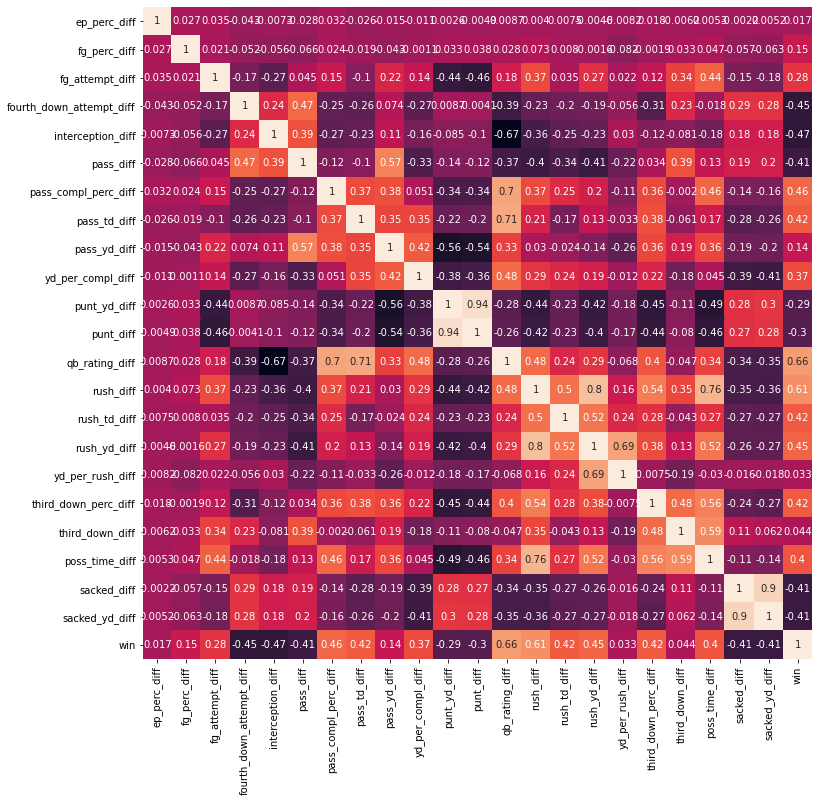

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(12,12))
_ = sns.heatmap(games.drop(columns=['season']).corr(), annot=True, cbar=False)
f.savefig('statscor.png', bbox_inches='tight')

In [15]:
games.to_csv('D:/Data/GameStatDiffs.csv')

In [16]:
pgs = pd.read_csv('PG_Features.csv')

rd = {'ARI':'CRD', 'BAL':'RAV', 'IND':'CLT', 'HOU':'HTX', 'TEN':'OTI', 'LAR':'RAM', 'OAK':'RAI', 
      'LAC':'SDG', 'LVR':'RAI'}
for k,v in rd.items():
    pgs['team_abbreviation'] = pgs.team_abbreviation.str.replace(k, v)
pgs.head()

,team_abbreviation,season,dline_avg_height,dline_avg_weight,dline_avg_age,linebacker_avg_height,linebacker_avg_weight,linebacker_avg_age,oline_avg_height,oline_avg_weight,...,rb_avg_age,secondary_avg_height,secondary_avg_weight,secondary_avg_age,tightend_avg_height,tightend_avg_weight,tightend_avg_age,team_avg_inches,team_avg_weight,team_avg_age
0,CRD,2016,77.67,308.33,27.67,74.00,240.67,25.33,76.80,317.40,...,25.0,71.33,200.50,25.83,78.0,265.00,29.00,74.29,242.09,26.38
1,CRD,2017,76.25,294.75,28.75,76.00,249.50,28.25,76.83,317.83,...,NaN,71.00,196.00,27.50,77.5,265.00,27.00,74.32,243.18,27.61
2,CRD,2018,76.00,292.20,27.00,73.00,235.00,26.50,77.00,312.25,...,27.0,72.00,204.00,27.20,76.0,246.33,26.67,74.29,243.33,26.44
3,CRD,2019,75.25,317.50,28.25,74.25,243.00,27.00,76.00,311.00,...,28.0,71.25,194.50,23.50,75.5,249.00,27.50,73.46,240.26,26.53
4,CRD,2020,75.29,317.00,27.86,75.00,246.14,26.86,76.50,305.25,...,25.0,71.63,194.38,26.00,76.5,244.50,26.00,73.95,243.93,26.76


In [17]:
abbrs = pd.read_csv('TeamAbbrs.csv')
pgs.merge(abbrs.rename(columns={'abbreviation':'team_abbreviation'}), on='team_abbreviation')\
    .to_csv('TeamSizes.csv')

In [18]:
winners = pd.read_csv('Winners.csv', usecols=['boxscore_index', 'opponent_abbr', 'season', 'result'])
winners = winners[winners.season>2015]
winners

,opponent_abbr,boxscore_index,season,result
0,MIN,202009130min,2020,Win
1,DET,202009200gnb,2020,Win
2,NOR,202009270nor,2020,Win
3,ATL,202010050gnb,2020,Win
4,HTX,202010250htx,2020,Win
...,...,...,...,...
1269,BUF,201609150buf,2016,Win
1270,RAV,201610230nyj,2016,Win
1271,CLE,201610300cle,2016,Win
1272,SFO,201612110sfo,2016,Win


In [19]:
losers = pd.read_csv('Losers.csv', usecols=['boxscore_index', 'opponent_abbr', 'season', 'result'])
losers = losers[losers.season>2015]
losers

,opponent_abbr,boxscore_index,season,result
0,TAM,202010180tam,2020,Loss
1,MIN,202011010gnb,2020,Loss
2,CLT,202011220clt,2020,Loss
3,OTI,202010130oti,2020,Loss
4,KAN,202010190buf,2020,Loss
...,...,...,...,...
1269,RAM,201611130nyj,2016,Loss
1270,NWE,201611270nyj,2016,Loss
1271,CLT,201612050nyj,2016,Loss
1272,MIA,201612170nyj,2016,Loss


In [20]:
loser_size = winners.merge(pgs.rename(columns={'team_abbreviation':'opponent_abbr'}), 
                           on=['season','opponent_abbr'])

In [21]:
cols = []
for col in loser_size.columns.to_list()[4:]:
    cols.append('l_'+col)
loser_size.rename(columns=dict(zip(loser_size.columns[4:], cols)), inplace=True)
loser_size

,opponent_abbr,boxscore_index,season,result,l_dline_avg_height,l_dline_avg_weight,l_dline_avg_age,l_linebacker_avg_height,l_linebacker_avg_weight,l_linebacker_avg_age,...,l_rb_avg_age,l_secondary_avg_height,l_secondary_avg_weight,l_secondary_avg_age,l_tightend_avg_height,l_tightend_avg_weight,l_tightend_avg_age,l_team_avg_inches,l_team_avg_weight,l_team_avg_age
0,MIN,202009130min,2020,Win,75.83,279.67,25.50,73.86,234.00,26.14,...,24.67,71.86,197.43,25.00,75.67,253.67,26.0,73.86,234.39,25.82
1,MIN,202012130tam,2020,Win,75.83,279.67,25.50,73.86,234.00,26.14,...,24.67,71.86,197.43,25.00,75.67,253.67,26.0,73.86,234.39,25.82
2,MIN,202009270min,2020,Win,75.83,279.67,25.50,73.86,234.00,26.14,...,24.67,71.86,197.43,25.00,75.67,253.67,26.0,73.86,234.39,25.82
3,MIN,202012250nor,2020,Win,75.83,279.67,25.50,73.86,234.00,26.14,...,24.67,71.86,197.43,25.00,75.67,253.67,26.0,73.86,234.39,25.82
4,MIN,202010110sea,2020,Win,75.83,279.67,25.50,73.86,234.00,26.14,...,24.67,71.86,197.43,25.00,75.67,253.67,26.0,73.86,234.39,25.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,WAS,201612190was,2016,Win,74.33,306.67,29.33,74.75,251.25,26.50,...,23.50,71.33,204.17,27.33,74.50,245.00,29.0,73.55,239.29,26.82
1270,WAS,201701010was,2016,Win,74.33,306.67,29.33,74.75,251.25,26.50,...,23.50,71.33,204.17,27.33,74.50,245.00,29.0,73.55,239.29,26.82
1271,DAL,201701010phi,2016,Win,75.20,290.20,25.80,72.67,241.67,25.67,...,21.00,71.67,202.83,26.67,77.00,261.50,28.5,73.96,243.71,26.49
1272,DAL,201609110dal,2016,Win,75.20,290.20,25.80,72.67,241.67,25.67,...,21.00,71.67,202.83,26.67,77.00,261.50,28.5,73.96,243.71,26.49


In [22]:
winner_size = losers.merge(pgs.rename(columns={'team_abbreviation':'opponent_abbr'}), 
                           on=['opponent_abbr','season'])
cols = []
for col in winner_size.columns.to_list()[4:]:
    cols.append('w_'+col)
winner_size.rename(columns=dict(zip(winner_size.columns[4:], cols)), inplace=True)
winner_size

,opponent_abbr,boxscore_index,season,result,w_dline_avg_height,w_dline_avg_weight,w_dline_avg_age,w_linebacker_avg_height,w_linebacker_avg_weight,w_linebacker_avg_age,...,w_rb_avg_age,w_secondary_avg_height,w_secondary_avg_weight,w_secondary_avg_age,w_tightend_avg_height,w_tightend_avg_weight,w_tightend_avg_age,w_team_avg_inches,w_team_avg_weight,w_team_avg_age
0,TAM,202010180tam,2020,Loss,76.00,312.00,28.50,74.50,252.00,27.33,...,24.0,71.50,199.67,24.17,77.75,255.0,28.25,73.75,236.54,27.04
1,TAM,202010250rai,2020,Loss,76.00,312.00,28.50,74.50,252.00,27.33,...,24.0,71.50,199.67,24.17,77.75,255.0,28.25,73.75,236.54,27.04
2,TAM,202012130tam,2020,Loss,76.00,312.00,28.50,74.50,252.00,27.33,...,24.0,71.50,199.67,24.17,77.75,255.0,28.25,73.75,236.54,27.04
3,TAM,202012200atl,2020,Loss,76.00,312.00,28.50,74.50,252.00,27.33,...,24.0,71.50,199.67,24.17,77.75,255.0,28.25,73.75,236.54,27.04
4,TAM,202101030tam,2020,Loss,76.00,312.00,28.50,74.50,252.00,27.33,...,24.0,71.50,199.67,24.17,77.75,255.0,28.25,73.75,236.54,27.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,BUF,201611200cin,2016,Loss,75.20,306.80,27.80,73.25,250.00,28.00,...,26.0,72.00,196.50,26.25,75.00,246.0,27.00,73.51,242.56,26.88
1270,BUF,201611270buf,2016,Loss,75.20,306.80,27.80,73.25,250.00,28.00,...,26.0,72.00,196.50,26.25,75.00,246.0,27.00,73.51,242.56,26.88
1271,CLE,201612240cle,2016,Loss,74.67,309.33,23.67,74.67,251.67,25.67,...,23.0,71.00,198.38,25.75,77.00,250.0,27.50,73.58,239.75,25.39
1272,SFO,201609120sfo,2016,Loss,76.25,315.50,26.00,73.80,246.60,27.20,...,26.0,72.33,199.00,25.83,77.00,252.0,28.00,74.18,243.05,26.02


In [23]:
df = winner_size.merge(loser_size.drop(columns=['opponent_abbr','season','result']), on='boxscore_index')
df.drop(columns=['opponent_abbr','result'], inplace=True)
df.fillna(method='ffill', inplace=True)
df

,boxscore_index,season,w_dline_avg_height,w_dline_avg_weight,w_dline_avg_age,w_linebacker_avg_height,w_linebacker_avg_weight,w_linebacker_avg_age,w_oline_avg_height,w_oline_avg_weight,...,l_rb_avg_age,l_secondary_avg_height,l_secondary_avg_weight,l_secondary_avg_age,l_tightend_avg_height,l_tightend_avg_weight,l_tightend_avg_age,l_team_avg_inches,l_team_avg_weight,l_team_avg_age
0,202010180tam,2020,76.00,312.00,28.50,74.50,252.00,27.33,75.67,321.33,...,25.50,71.75,196.88,24.88,76.00,245.25,27.00,73.95,236.52,25.95
1,202010250rai,2020,76.00,312.00,28.50,74.50,252.00,27.33,75.67,321.33,...,24.67,72.00,203.14,26.00,77.33,256.00,29.67,74.00,240.26,26.33
2,202012130tam,2020,76.00,312.00,28.50,74.50,252.00,27.33,75.67,321.33,...,24.67,71.86,197.43,25.00,75.67,253.67,26.00,73.86,234.39,25.82
3,202012200atl,2020,76.00,312.00,28.50,74.50,252.00,27.33,75.67,321.33,...,26.33,71.56,202.22,25.78,76.50,249.00,29.50,73.35,234.23,26.70
4,202101030tam,2020,76.00,312.00,28.50,74.50,252.00,27.33,75.67,321.33,...,26.33,71.56,202.22,25.78,76.50,249.00,29.50,73.35,234.23,26.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,201611200cin,2016,75.20,306.80,27.80,73.25,250.00,28.00,76.33,321.83,...,24.00,73.00,202.40,27.00,77.33,255.67,24.00,74.48,246.10,26.65
1270,201611270buf,2016,75.20,306.80,27.80,73.25,250.00,28.00,76.33,321.83,...,23.00,72.75,209.25,25.25,77.33,260.33,27.67,73.86,244.47,25.78
1271,201612240cle,2016,74.67,309.33,23.67,74.67,251.67,25.67,76.83,313.33,...,23.00,71.00,194.71,26.29,76.67,253.33,29.00,73.65,240.29,26.11
1272,201609120sfo,2016,76.25,315.50,26.00,73.80,246.60,27.20,77.50,321.25,...,22.00,72.00,204.60,25.20,76.50,252.50,25.50,74.04,238.60,25.28


In [24]:
winners = pd.DataFrame()
winners['boxscore_index'] = df.boxscore_index
winners['dline_avg_height_diff'] = df.w_dline_avg_height - df.l_dline_avg_height
winners['dline_avg_weight_diff'] = df.w_dline_avg_weight - df.l_dline_avg_weight
winners['dline_avg_age_diff'] = df.w_dline_avg_age - df.l_dline_avg_age
winners['linebacker_avg_height_diff'] = df.w_linebacker_avg_height - df.l_linebacker_avg_height
winners['linebacker_avg_weight_diff'] = df.w_linebacker_avg_weight - df.l_linebacker_avg_weight
winners['linebacker_avg_age_diff'] = df.w_linebacker_avg_age - df.l_linebacker_avg_age
winners['oline_avg_height_diff'] = df.w_oline_avg_height - df.l_oline_avg_height
winners['oline_avg_weight_diff'] = df.w_oline_avg_weight - df.l_oline_avg_weight
winners['oline_avg_age_diff'] = df.w_oline_avg_age - df.l_oline_avg_age
winners['other_avg_height_diff'] = df.w_other_avg_height - df.l_other_avg_height
winners['other_avg_weight_diff'] = df.w_other_avg_weight - df.l_other_avg_weight
winners['other_avg_age_diff'] = df.w_other_avg_age - df.l_other_avg_age
winners['qb_avg_height_diff'] = df.w_qb_avg_height - df.l_qb_avg_height
winners['qb_avg_weight_diff'] = df.w_qb_avg_weight - df.l_qb_avg_weight
winners['qb_avg_age_diff'] = df.w_qb_avg_age - df.l_qb_avg_age
winners['rb_avg_height_diff'] = df.w_rb_avg_height - df.l_rb_avg_height
winners['rb_avg_weight_diff'] = df.w_rb_avg_weight - df.l_rb_avg_weight
winners['rb_avg_age_diff'] = df.w_rb_avg_age - df.l_rb_avg_age
winners['receivers_avg_height_diff'] = df.w_receivers_avg_height - df.l_receivers_avg_height
winners['receivers_avg_weight_diff'] = df.w_receivers_avg_weight - df.l_receivers_avg_weight
winners['receivers_avg_age_diff'] = df.w_receivers_avg_age - df.l_receivers_avg_age
winners['secondary_avg_height_diff'] = df.w_secondary_avg_height - df.l_secondary_avg_height
winners['secondary_avg_weight_diff'] = df.w_secondary_avg_weight - df.l_secondary_avg_weight
winners['secondary_avg_age_diff'] = df.w_secondary_avg_age - df.l_secondary_avg_age
winners['tightend_avg_height_diff'] = df.w_tightend_avg_height - df.l_tightend_avg_height
winners['tightend_avg_weight_diff'] = df.w_tightend_avg_weight - df.l_tightend_avg_weight
winners['tightend_avg_age_diff'] = df.w_tightend_avg_age - df.l_tightend_avg_age
winners['team_avg_height_diff'] = df.w_team_avg_inches - df.l_team_avg_inches
winners['team_avg_weight_diff'] = df.w_team_avg_weight - df.l_team_avg_weight
winners['team_avg_age_diff'] = df.w_team_avg_age - df.l_team_avg_age
winners['win'] = 1

In [25]:
losers = pd.DataFrame()
losers['boxscore_index'] = df.boxscore_index
losers['dline_avg_height_diff'] = df.l_dline_avg_height - df.w_dline_avg_height
losers['dline_avg_weight_diff'] = df.l_dline_avg_weight - df.w_dline_avg_weight
losers['dline_avg_age_diff'] = df.l_dline_avg_age - df.w_dline_avg_age
losers['linebacker_avg_height_diff'] = df.l_linebacker_avg_height - df.w_linebacker_avg_height
losers['linebacker_avg_weight_diff'] = df.l_linebacker_avg_weight - df.w_linebacker_avg_weight
losers['linebacker_avg_age_diff'] = df.l_linebacker_avg_age - df.w_linebacker_avg_age
losers['oline_avg_height_diff'] = df.l_oline_avg_height - df.w_oline_avg_height
losers['oline_avg_weight_diff'] = df.l_oline_avg_weight - df.w_oline_avg_weight
losers['oline_avg_age_diff'] = df.l_oline_avg_age - df.w_oline_avg_age
losers['other_avg_height_diff'] = df.l_other_avg_height - df.w_other_avg_height
losers['other_avg_weight_diff'] = df.l_other_avg_weight - df.w_other_avg_weight
losers['other_avg_age_diff'] = df.l_other_avg_age - df.w_other_avg_age
losers['qb_avg_height_diff'] = df.l_qb_avg_height - df.w_qb_avg_height
losers['qb_avg_weight_diff'] = df.l_qb_avg_weight - df.w_qb_avg_weight
losers['qb_avg_age_diff'] = df.l_qb_avg_age - df.w_qb_avg_age
losers['rb_avg_height_diff'] = df.l_rb_avg_height - df.w_rb_avg_height
losers['rb_avg_weight_diff'] = df.l_rb_avg_weight - df.w_rb_avg_weight
losers['rb_avg_age_diff'] = df.l_rb_avg_age - df.w_rb_avg_age
losers['receivers_avg_height_diff'] = df.l_receivers_avg_height - df.w_receivers_avg_height
losers['receivers_avg_weight_diff'] = df.l_receivers_avg_weight - df.w_receivers_avg_weight
losers['receivers_avg_age_diff'] = df.l_receivers_avg_age - df.w_receivers_avg_age
losers['secondary_avg_height_diff'] = df.l_secondary_avg_height - df.w_secondary_avg_height
losers['secondary_avg_weight_diff'] = df.l_secondary_avg_weight - df.w_secondary_avg_weight
losers['secondary_avg_age_diff'] = df.l_secondary_avg_age - df.w_secondary_avg_age
losers['tightend_avg_height_diff'] = df.l_tightend_avg_height - df.w_tightend_avg_height
losers['tightend_avg_weight_diff'] = df.l_tightend_avg_weight - df.w_tightend_avg_weight
losers['tightend_avg_age_diff'] = df.l_tightend_avg_age - df.w_tightend_avg_age
losers['team_avg_height_diff'] = df.l_team_avg_inches - df.w_team_avg_inches
losers['team_avg_weight_diff'] = df.l_team_avg_weight - df.w_team_avg_weight
losers['team_avg_age_diff'] = df.l_team_avg_age - df.w_team_avg_age
losers['win'] = 0

In [26]:
game_sizes = winners.append(losers)
game_sizes

,boxscore_index,dline_avg_height_diff,dline_avg_weight_diff,dline_avg_age_diff,linebacker_avg_height_diff,linebacker_avg_weight_diff,linebacker_avg_age_diff,oline_avg_height_diff,oline_avg_weight_diff,oline_avg_age_diff,...,secondary_avg_height_diff,secondary_avg_weight_diff,secondary_avg_age_diff,tightend_avg_height_diff,tightend_avg_weight_diff,tightend_avg_age_diff,team_avg_height_diff,team_avg_weight_diff,team_avg_age_diff,win
0,202010180tam,0.00,12.67,3.50,-0.50,-0.14,2.19,-0.33,12.08,1.00,...,-0.25,2.79,-0.71,1.75,9.75,1.25,-0.20,0.02,1.09,1
1,202010250rai,0.29,22.14,3.36,1.90,27.40,0.53,-2.13,-13.67,2.60,...,-0.50,-3.47,-1.83,0.42,-1.00,-1.42,-0.25,-3.72,0.71,1
2,202012130tam,0.17,32.33,3.00,0.64,18.00,1.19,-1.33,16.58,2.25,...,-0.36,2.24,-0.83,2.08,1.33,2.25,-0.11,2.15,1.22,1
3,202012200atl,1.50,31.67,1.67,0.25,21.00,2.58,-1.33,9.58,0.25,...,-0.06,-2.55,-1.61,1.25,6.00,-1.25,0.40,2.31,0.34,1
4,202101030tam,1.50,31.67,1.67,0.25,21.00,2.58,-1.33,9.58,0.25,...,-0.06,-2.55,-1.61,1.25,6.00,-1.25,0.40,2.31,0.34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,201611200cin,1.05,-9.30,1.20,0.25,-0.25,1.75,0.47,-8.63,-0.30,...,1.00,5.90,0.75,2.33,9.67,-3.00,0.97,3.54,-0.23,0
1270,201611270buf,0.13,-13.47,-1.30,0.75,-19.67,-2.00,0.07,-1.63,-0.90,...,0.75,12.75,-1.00,2.33,14.33,0.67,0.35,1.91,-1.10,0
1271,201612240cle,-0.17,-13.33,2.58,-1.67,-13.07,-0.47,1.17,7.67,1.23,...,0.00,-3.67,0.54,-0.33,3.33,1.50,0.07,0.54,0.72,0
1272,201609120sfo,-0.65,-46.10,1.60,0.20,-14.10,-1.20,0.00,-1.25,-0.75,...,-0.33,5.60,-0.63,-0.50,0.50,-2.50,-0.14,-4.45,-0.74,0


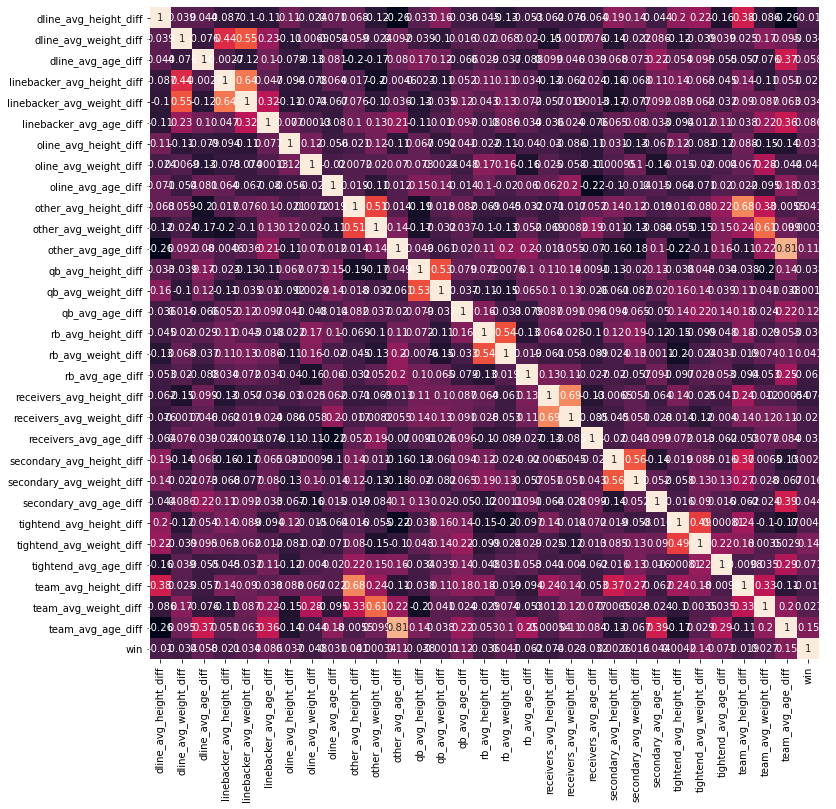

In [27]:
f = plt.figure(figsize = (12,12))
_ = sns.heatmap(game_sizes.corr(), annot=True, cbar=False)
f.savefig('sizecor.png', bbox_inches='tight')

In [28]:
game_sizes.to_csv('D:/Data/GameSizeDiffs.csv')